## Intel Image Classification

##### This is image data of Natural Scenes around the world.

##### Content 
##### This Data contains around 25k images of size 150x150 distributed under 6 categories.
#####       {'buildings' -> 0,
 #####       'forest' -> 1,
 #####       'glacier' -> 2,
#####        'mountain' -> 3,
#####        'sea' -> 4,
#####        'street' -> 5
#####        }



In [43]:
# only for cuda enabled laptop and desktop
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Physical Devices:", physical_devices)
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Physical Devices: []


In [44]:
# # Load the Libraries

import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pathlib
import zipfile
import glob

In [45]:
Dir_Path = r"C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\"
train_zip_path = os.path.join(Dir_Path, "seg_train.zip")
test_zip_path = os.path.join(Dir_Path, "seg_test.zip")

# train_dir = r"C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\seg_train.zip"
# test_dir = r"C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\seg_test.zip"

In [46]:
# Step 2: Check if zip files exist

if not os.path.exists(train_zip_path):
    print(f"Training zip file does not exist at {train_zip_path}")
if not os.path.exists(test_zip_path):
    print(f"Testing zip file does not exist at {test_zip_path}")

In [47]:
print(Dir_Path)
print(train_zip_path)
print(test_zip_path)

C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\
C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\seg_train.zip
C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\seg_test.zip


In [48]:
# list the directories inside the germantrafficsigns 

directory = os.listdir(Dir_Path)

directory


['intel_image_Classifier_model.h5',
 'seg_test',
 'seg_test.zip',
 'seg_train',
 'seg_train.zip']

In [49]:
train_dir = tf.keras.utils.get_file(
    fname="image_train.zip",
    origin=f"file:\\{train_zip_path}",
    extract=True,
    archive_format="zip"
)


In [50]:
test_dir = tf.keras.utils.get_file(
    fname="image_test.zip",
    origin=f"file:\\{test_zip_path}",
    extract=True,
    archive_format="zip"
)

In [51]:
train_dir = os.path.join(Dir_Path, "seg_train")
test_dir = os.path.join(Dir_Path, "seg_test")

print(train_dir)
print(test_dir)


C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\seg_train
C:\\Users\\demog\\.keras\\datasets\\Intel_Image_Classification\\seg_test


In [52]:
# explore train directory
train_contains = os.listdir(train_dir)
print(len(train_contains))
train_contains

6


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [53]:
# print one of the sample Image using

from tensorflow.keras.utils import load_img,img_to_array



In [54]:


forest = 'C:/Users/demog/.keras/datasets/Intel_Image_Classification/seg_train/forest/'
print('total images in forest :' ,len(forest))
print ('\n')

print("Files in directory:", os.listdir(forest))


total images in forest : 75


Files in directory: ['10007.jpg', '10010.jpg', '10020.jpg', '10030.jpg', '10037.jpg', '1004.jpg', '10050.jpg', '10051.jpg', '10074.jpg', '10078.jpg', '10086.jpg', '10088.jpg', '10089.jpg', '10098.jpg', '10103.jpg', '10116.jpg', '10121.jpg', '10123.jpg', '10135.jpg', '10138.jpg', '10142.jpg', '10145.jpg', '10146.jpg', '10153.jpg', '10154.jpg', '10155.jpg', '1017.jpg', '10180.jpg', '10186.jpg', '10194.jpg', '10197.jpg', '10207.jpg', '10217.jpg', '10223.jpg', '10235.jpg', '10239.jpg', '1024.jpg', '10240.jpg', '10242.jpg', '1025.jpg', '10258.jpg', '10263.jpg', '10275.jpg', '10281.jpg', '10283.jpg', '10285.jpg', '10294.jpg', '10314.jpg', '10320.jpg', '10325.jpg', '10330.jpg', '1034.jpg', '10341.jpg', '10346.jpg', '10347.jpg', '10359.jpg', '10368.jpg', '10370.jpg', '10376.jpg', '10379.jpg', '10387.jpg', '10394.jpg', '10411.jpg', '10417.jpg', '10441.jpg', '10464.jpg', '10492.jpg', '10497.jpg', '1050.jpg', '10510.jpg', '10513.jpg', '10519.jpg', '10527.jpg', '10533

In [55]:
image_path = r'C:\Users\demog\.keras\datasets\Intel_Image_Classification\seg_train\forest\12968.jpg'

In [56]:
if os.path.isfile(image_path):
    img = load_img(image_path)
    print("Image loaded successfully.")
else:
    print(f"File not found: {image_path}")

Image loaded successfully.


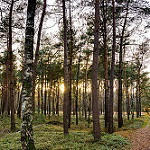

In [57]:
img

In [58]:
#  predefine Batch Size , Image size (beacause images are different shapes)

BATCH_SIZE = 32
IMG_SIZE = (150, 150)

In [59]:
# Load the training dataset from the specified directory

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

# Path to the directory containing the training images
# Whether to shuffle the dataset before creating batches
# Number of images to include in each batch
# Resize all images to this size (width, height)

Found 14034 files belonging to 6 classes.


In [60]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 3000 files belonging to 6 classes.


In [61]:
# find the classes from  the dataset

class_names =train_dataset.class_names

class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [62]:
# Retrieve a sample batch from the training dataset
sample_img, labels = next(iter(train_dataset))

# Print the shape of the sample images and labels
print("Sample Images Shape:", sample_img.shape)
print("Labels Shape:", labels.shape)

Sample Images Shape: (32, 150, 150, 3)
Labels Shape: (32,)


In [63]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 0, 0, 0, 1, 4, 2, 4, 3, 5, 3, 5, 1, 1, 1, 1, 3, 1, 1, 2, 2,
       2, 4, 2, 1, 1, 5, 1, 4, 5, 3])>

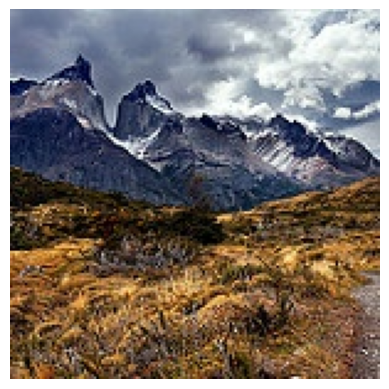

Label: 3
Class Name: mountain


In [26]:
# [Print image as per index ]
index = 4  # We can change this to any valid index within the batch size
plt.imshow(sample_img[index].numpy().astype('uint8'))
plt.axis('off')  # Hide axes for better visualization
plt.show()  # Show the image

# Print the label and class name for the image at index 

print("Label:", labels[index].numpy())  # Convert tensor to NumPy for display
print("Class Name:", class_names[labels[index].numpy()])  # Use label as index to get class name

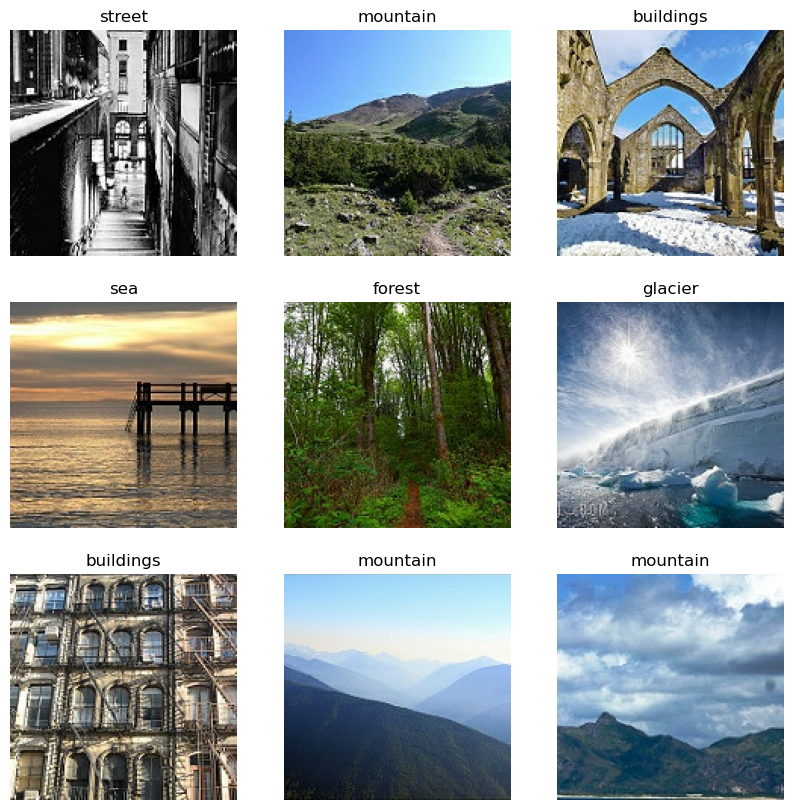

In [64]:
# plot the distribution to view multiple images

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")
   

In [65]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [66]:
# prepare model
"""
model = Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    layers.Rescaling(1./255),
    # Data augmentation (optional, but recommended)
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.Conv2D(32, 5, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
"""

model = Sequential([
    Input(shape=(150, 150, 3)),             # 1. Explicit Input layer
    Rescaling(1./255),
    Conv2D(32, 5, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
    # Data augmentation to increase dataset diversity and prevent overfitting.
    # Rescale pixel values to be between 0 and 1 .
    # Convolutional layer with 32 filters, kernel size 5x5, and ReLU activation .
    # Batch normalization to stabilize learning .
    # Max pooling to reduce spatial dimensions and extract dominant features .
    # Convolutional layer with 64 filters, kernel size 3x3, and ReLU activation.
    # Batch normalization .
    # Max pooling.
    # Convolutional layer with 128 filters, kernel size 3x3, and ReLU activation .
    # Flatten the output of convolutional and pooling layers into a 1D vector .
    # Dropout to prevent overfitting by randomly dropping neurons



In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,714,310 (40.87 MB)

 Trainable params: 10,713,862 (40.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [68]:
# Compile model 

model.compile(optimizer= Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Callback for robust training
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [69]:
# traain model

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[early_stop]
)

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.5255 - loss: 1.6063 - val_accuracy: 0.5537 - val_loss: 1.5541
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 627s 1s/step - accuracy: 0.7142 - loss: 0.7990 - val_accuracy: 0.7670 - val_loss: 0.6589
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 377s 856ms/step - accuracy: 0.7728 - loss: 0.6228 - val_accuracy: 0.8013 - val_loss: 0.5922
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 305s 694ms/step - accuracy: 0.8169 - loss: 0.5045 - val_accuracy: 0.8013 - val_loss: 0.6008
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 301s 685ms/step - accuracy: 0.8511 - loss: 0.4170 - val_accuracy: 0.7943 - val_loss: 0.7128
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 296s 674ms/step - accuracy: 0.8829 - loss: 0.3154 - val_accuracy: 0.8150 - val_loss: 0.6465


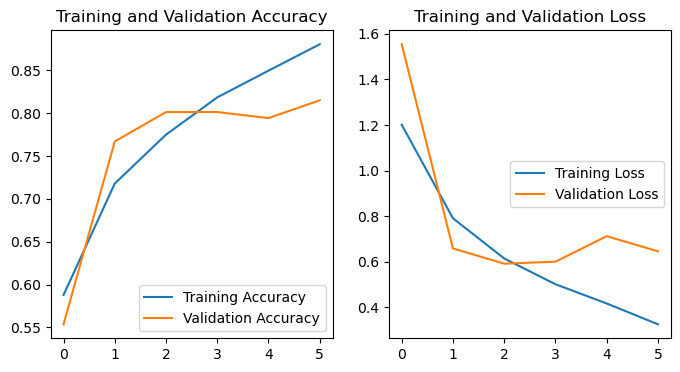

In [72]:
# plot the distribution

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:


# Pass dummy data to build the model

dummy_input = tf.random.normal([1, 150, 150, 3])
_ = model(dummy_input) 

# Forward pass to build the model



In [74]:
# -------- Save Model for Deployment --------

model.save("intel_image_Classifier_model.h5")
print("Model saved as Intel_image_Classifier_V1_models.h5")


Model saved as Intel_image_Classifier_V1_models.h5
